In [5]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

Взял данные по погоде из 'живого архива', близко к фактическому месту моего проживания.
(Самую ближнюю точку) Можно выбирать любой допустимый интервал по датам и
скачивать таблицу наблюдения для изучения. :)

# Возможности библиотеки Matplotlib

In [6]:
page_url = 'http://pogoda-service.ru/archive_gsod_res.php?country=RS&station=370008&datepicker_beg=01.01.2019&datepicker_end=31.12.2019&bsubmit=%D0%9F%D0%BE%D1%81%D0%BC%D0%BE%D1%82%D1%80%D0%B5%D1%82%D1%8C'
df = pd.read_html(page_url, attrs = {'class': 'table_res'}, encoding='utf-8')[0]
df

,Дата,Максимальная температура,Минимальная температура,Средняя температура,Атмосферное давление,Скорость ветра,Осадки,Эффективная температура
0,01.01.2019,-2.0,-7.0,-5.1,NaN,5,NaN,-10.5
1,02.01.2019,-3.0,-4.0,-3.4,NaN,6,NaN,-9.3
2,03.01.2019,-2.0,-4.0,-3.2,NaN,5,NaN,-8.4
3,04.01.2019,-4.0,-6.0,-4.4,NaN,2,NaN,-7.8
4,05.01.2019,-5.0,-8.0,-6.1,NaN,2,NaN,-9.7
...,...,...,...,...,...,...,...,...
356,27.12.2019,-1.0,-4.0,-1.7,NaN,2,NaN,-4.8
357,28.12.2019,-1.0,-4.0,-2.7,NaN,4,NaN,-7.2
358,29.12.2019,-3.0,-4.0,-3.3,NaN,3,NaN,-7.3
359,30.12.2019,0.0,-4.0,-2.6,NaN,7,NaN,-9.1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 8 columns):
Дата                        361 non-null object
Максимальная температура    360 non-null float64
Минимальная температура     360 non-null float64
Средняя температура         361 non-null float64
Атмосферное давление        0 non-null float64
Скорость ветра              361 non-null int64
Осадки                      122 non-null float64
Эффективная температура     361 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 22.7+ KB


Видно, что нет данных за какую-то дату (361 дата, но 360 значений по температурам) (эта дата 25.12.2019) и с 16.05.2019 по 19.05.2019 вообще нет данных.
Увидел посмотрев всю таблицу. Можно, конечно, это и с помощью питона найти, но домашняя работа
подразумевает немного иное. Работа с отсутствующими данными, это следующий модуль в моём обучении.
Следовательно, пока возьму и дропну данные, как это было на лекции. Перед этим сохранив на диск
начальное.

In [27]:
df.to_csv('Domo2019.csv', index=False) # загрузил на компьютер, а то мало ли.

In [8]:
Domo2019 = df.copy()

In [9]:
Domo2019.drop(['Атмосферное давление', 'Осадки'], axis='columns', inplace=True)
Domo2019 = Domo2019.dropna()
Domo2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 360
Data columns (total 6 columns):
Дата                        360 non-null object
Максимальная температура    360 non-null float64
Минимальная температура     360 non-null float64
Средняя температура         360 non-null float64
Скорость ветра              360 non-null int64
Эффективная температура     360 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 19.7+ KB


In [10]:
Domo2019

,Дата,Максимальная температура,Минимальная температура,Средняя температура,Скорость ветра,Эффективная температура
0,01.01.2019,-2.0,-7.0,-5.1,5,-10.5
1,02.01.2019,-3.0,-4.0,-3.4,6,-9.3
2,03.01.2019,-2.0,-4.0,-3.2,5,-8.4
3,04.01.2019,-4.0,-6.0,-4.4,2,-7.8
4,05.01.2019,-5.0,-8.0,-6.1,2,-9.7
...,...,...,...,...,...,...
356,27.12.2019,-1.0,-4.0,-1.7,2,-4.8
357,28.12.2019,-1.0,-4.0,-2.7,4,-7.2
358,29.12.2019,-3.0,-4.0,-3.3,3,-7.3
359,30.12.2019,0.0,-4.0,-2.6,7,-9.1


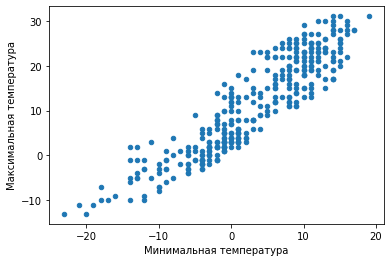

In [11]:
Domo2019.plot.scatter(x='Минимальная температура' , y='Максимальная температура')

([], <a list of 0 Text xticklabel objects>)

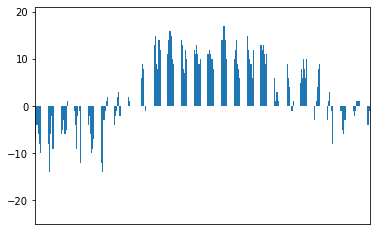

In [46]:
Domo2019['Минимальная температура'].plot(kind='bar', rot=45)  #'Минимальная температура'
plt.xticks([])

([], <a list of 0 Text xticklabel objects>)

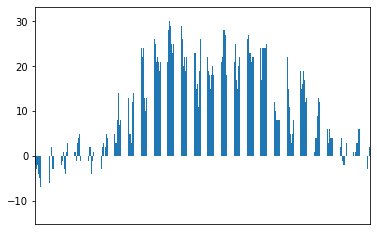

In [47]:
Domo2019['Максимальная температура'].plot(kind='bar', rot=45)  #'Максимальная температура'
plt.xticks([])

Количество ветреных дней в году (по значению)

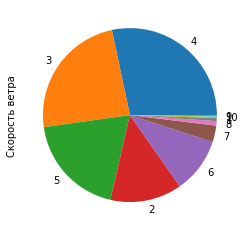

In [62]:
Wind_days = Domo2019.sort_values('Скорость ветра')['Скорость ветра'].value_counts() #(by='Count', ascending=False)  #groupby(['Скорость ветра']) 
# name_dynamics
Wind_days.plot(kind='pie', y='Count')

Из пирога видно, что самые ветренные дни, когда ветер достигал от 3 до 5 м/с.
Безветренной погоды и с порывами ветрами, это особые дни. Не так много.

# Возможности библиотеки Seaborn

In [62]:
import seaborn as sns

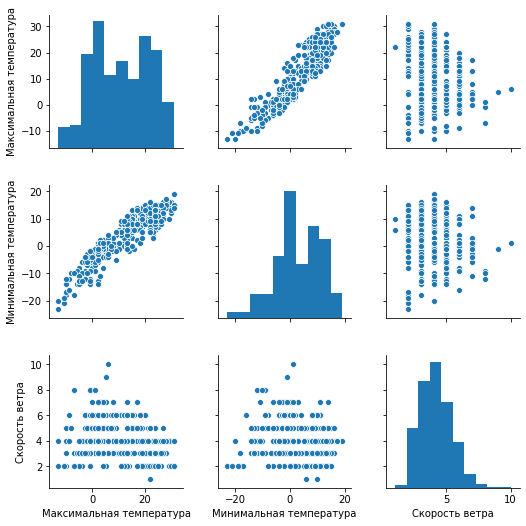

In [35]:
sns_plot = sns.pairplot(
    Domo2019[['Максимальная температура', 'Минимальная температура', 'Скорость ветра']])
sns_plot

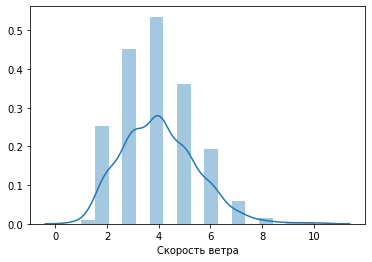

In [37]:
sns.distplot(Domo2019['Скорость ветра'])

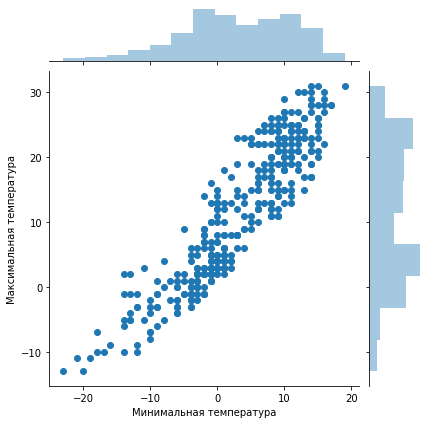

In [38]:
sns.jointplot(x='Минимальная температура', y='Максимальная температура', 
              data=Domo2019, kind='scatter')

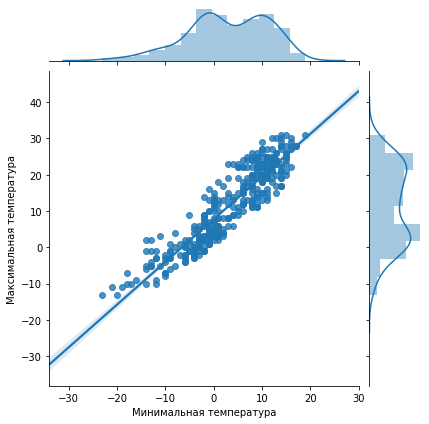

In [39]:
sns.jointplot(x='Минимальная температура', y='Максимальная температура', 
              data=Domo2019, kind='reg')

Чем интересна вышеуказанная модель, линия это некая усреднённая величина, которая показывает
как вела температура в данный год в местности.
Если взять разные такие линии за разные года, то можно сказать, какой год был жарче или холоднее.
Или вовсе аномальный. Вспомнить, какими холодными были зимы и как тепло порой было летом.

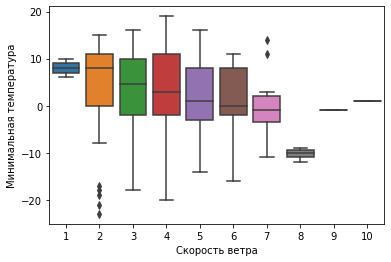

In [59]:
axmin = sns.boxplot(x='Скорость ветра', y='Минимальная температура', 
            data=Domo2019)

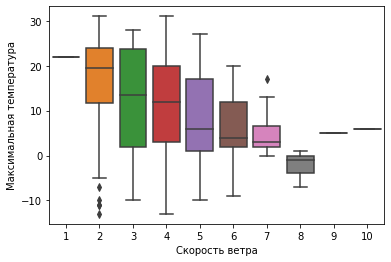

In [60]:
axmax = sns.boxplot(x='Скорость ветра', y='Максимальная температура', 
            data=Domo2019)

Если рассматривать медиану температур (максимальной и минимальной), то с ростом скорости
света становится холодней. Можно заметить особенности при значениях ветра 2 м/с и 7 м/с
При скорости 2 м/с есть особые дни, когда становится особо холодно. А в случае со скоростью
7 м/с дни, с особой жарой.

Интересно, как располагают метеостанции, чтобы не было никаких технических нюансов,
влияющих на данную выявленную зависимость. И чем дополнительно отличались дни.
Но, прослеживается некоторая особенность именно к этим значениям скорости ветра.

Отдельно нарисуем в plotly особые случаи, чтобы визуально смотреть данные.

In [61]:
?sns.boxplot

# plotly

In [16]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [27]:
data = []
data.append(
        go.Box(y=Domo2019[Domo2019['Скорость ветра']==2]['Максимальная температура'], 
               name='Максимальная температура при скорости ветра 2')
    )
data.append(
        go.Box(y=Domo2019[Domo2019['Скорость ветра']==7]['Максимальная температура'], 
               name='Максимальная температура при скорости ветра 7')
    )
iplot(data, show_link = False)

In [28]:
data = []
data.append(
        go.Box(y=Domo2019[Domo2019['Скорость ветра']==2]['Минимальная температура'], 
               name='Минимальная температура при скорости ветра 2')
    )
data.append(
        go.Box(y=Domo2019[Domo2019['Скорость ветра']==7]['Минимальная температура'], 
               name='Минимальная температура при скорости ветра 7')
    )
iplot(data, show_link = False)

In [15]:
?iplot